# pyhf hello world 4

Ryan Reece <https://github.com/rreece>        
created: 2020-07-09

In [1]:
import math
import numpy as np
import pyhf

import hepplot as hep

## Setup input data

In [2]:
bins = list(range(6))
y = [ [9,8,6,4,1], [12,10,7,2,2], [6,10,8,5,2] ]
data = [26, 30, 19, 12, 6]
signals = [
    [0.2, 0.6, 0.7, 1.1, 0.5],
    [0.2, 0.6, 0.7, 1.1, 0.5],
    [0.2, 0.6, 0.7, 1.1, 0.5],
    [0.2, 0.6, 0.7, 1.1, 0.5],
    ]

labels = ['A','B','C']
data_label='Data'
signal_labels = ['signal', r'signal $\times2$', r'signal $\times4$', r'signal $\times8$']

for i_signal in range(len(signals)):
    for j_bin in range(len(signals[i_signal])):
        signals[i_signal][j_bin] = signals[i_signal][j_bin]*(2**i_signal)

ytotal  = [sum(i) for i in zip(*y)]

## gaussian errors
yerr    = [
    0.2*math.sqrt(_y) for _y in ytotal
]
yerrs   = [
    [0.1*math.sqrt(_y) for _y in y_i] for y_i in y
]

## asymmetric errors
#yerr    = [
#    [0.2*hep.stat.poisson_error_up(_y), 0.2*hep.stat.poisson_error_down(_y)] for _y in ytotal
#]
#yerrs   = [
#    [[0.3*math.sqrt(_y), 0.2*math.sqrt(_y)] for _y in y_i] for y_i in y
#]

## Histograms

(<Figure size 720x720 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11706f5c0>])

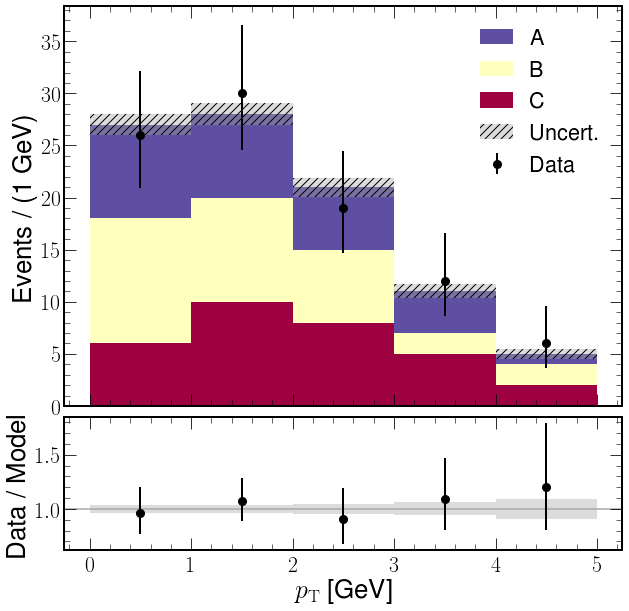

In [3]:
hep.plot.hist1d(bins, y,
                yerr=yerr,
                labels=labels,
                data=data,
                data_label=data_label,
                xlabel=r'$p_\mathrm{T}$',
                ylabel='Events',
                unit='GeV',
                ratio=True)

(<Figure size 720x720 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x117fbe5c0>])

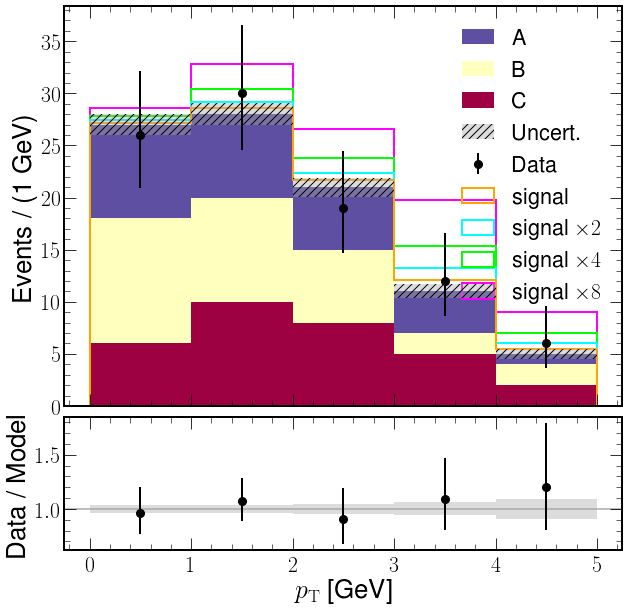

In [4]:
hep.plot.hist1d(bins, y,
                yerr=yerr,
                labels=labels,
                data=data,
                data_label=data_label,
                signals=signals,
                signal_labels=signal_labels,
                xlabel='$p_\mathrm{T}$',
                ylabel='Events',
                unit='GeV',
                ratio=True)

## Hypothesis testing with pyhf

### TODO:

-   Explain `pyhf.simplemodels.hepdata_like`
    -   Marked Poisson
    -   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>

## Basic hypothesis test at mu=1.0

In [5]:
list_of_results = list()
for i_signal, signal in enumerate(signals):
    print('Testing signal %i' % (i_signal+1))
    pdf = hep.stat.make_pdf(bkg_data=ytotal, bkg_uncerts=yerr, signal_data=signal)
    CLs_obs, CLs_exp_band = hep.stat.hypo_test(pdf=pdf, data=data, mu=1.0)
    results = dict()
    results['pdf'] = pdf
    results['CLs_obs'] = CLs_obs
    results['CLs_exp_band'] = CLs_exp_band
    list_of_results.append(results)
    print('Expected CLs -2 sigma: %.4f' % (CLs_exp_band[0]))
    print('Expected CLs -1 sigma: %.4f' % (CLs_exp_band[1]))
    print('Expected CLs         : %.4f' % (CLs_exp_band[2]))
    print('Expected CLs +1 sigma: %.4f' % (CLs_exp_band[3]))
    print('Expected CLs +2 sigma: %.4f' % (CLs_exp_band[4]))
    print('Observed CLs         : %.4f' % (CLs_obs))
    print('')

Testing signal 1
Expected CLs -2 sigma: 0.3372
Expected CLs -1 sigma: 0.4865
Expected CLs         : 0.6714
Expected CLs +1 sigma: 0.8529
Expected CLs +2 sigma: 0.9644
Observed CLs         : 0.7395

Testing signal 2
Expected CLs -2 sigma: 0.1028
Expected CLs -1 sigma: 0.2127
Expected CLs         : 0.4074
Expected CLs +1 sigma: 0.6752
Expected CLs +2 sigma: 0.8998
Observed CLs         : 0.4955

Testing signal 3
Expected CLs -2 sigma: 0.0074
Expected CLs -1 sigma: 0.0305
Expected CLs         : 0.1126
Expected CLs +1 sigma: 0.3313
Expected CLs +2 sigma: 0.6757
Observed CLs         : 0.1665

Testing signal 4
Expected CLs -2 sigma: 0.0000
Expected CLs -1 sigma: 0.0002
Expected CLs         : 0.0032
Expected CLs +1 sigma: 0.0306
Expected CLs +2 sigma: 0.1757
Observed CLs         : 0.0067



## Hypothesis test scan

In [6]:
pdf = hep.stat.make_pdf(bkg_data=ytotal, bkg_uncerts=yerr, signal_data=signals[0])
hypo_tests, test_mus = hep.stat.hypo_test_scan(pdf, 
                                               data, 
                                               mu_bounds=(0, 10))

In [7]:
hep.plot.plot_mu_scan(hypo_tests, test_mus)

AttributeError: module 'hepplot.plot' has no attribute 'plot_mu_scan'

In [ ]:
hep.stat.invert_interval(hypo_tests, test_mus)

## TODO: Learn about these

In [ ]:
best_fit = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf)

In [ ]:
best_fit

In [ ]:
nominal = pdf.config.suggested_init()
background_only = pdf.config.suggested_init()
background_only[pdf.config.poi_index] = 0.0
best_fit = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf)

In [ ]:
nominal

In [ ]:
background_only

In [ ]:
par_bounds = pdf.config.suggested_bounds()

In [ ]:
par_bounds

In [ ]:
unconpars = pyhf.infer.mle.fit(data + pdf.config.auxdata, pdf, nominal, par_bounds)
print("parameters post unconstrained fit: {}".format(unconpars))

In [ ]:
conpars = pyhf.infer.mle.fixed_poi_fit(0.0, data + pdf.config.auxdata, pdf, nominal, par_bounds)
print("parameters post constrained fit: {}".format(conpars))

In [ ]:
pdf.expected_data(conpars)

In [ ]:
pdf.config.poi_index

## See also

-   Cowan, G. et al. (2010). Asymptotic formulae for likelihood-based tests of new physics. https://arxiv.org/abs/1007.1727
-   Cranmer, K. et al. (2012). HistFactory: A tool for creating statistical models for use with RooFit and RooStats. CERN-OPEN-2012-016. <https://cds.cern.ch/record/1456844>
-   Heinrich, L., Feickert, M., & Stark, G. (2018). [pyhf](https://github.com/scikit-hep/pyhf). <https://scikit-hep.org/pyhf/>
-   Feickert, M. (2018). pyhf: a pure Python implementation of HistFactory with tensors and autograd. <https://indico.cern.ch/event/759480/>
-   <https://github.com/CoffeaTeam/coffea/blob/master/coffea/hist/plot.py>
-   <https://scikit-hep.org/pyhf/examples/notebooks/multichannel-coupled-histo.html>
-   <https://scikit-hep.org/pyhf/examples/notebooks/binderexample/StatisticalAnalysis.html>